In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Repeat with last year's data

### Load the data


In [3]:
import pandas as pd

trade_last_year = pd.read_excel("export_2020m1.xlsx", skiprows=1, index_col=0, nrows=7)
trade_last_year

,Canada,France,Germany,Italy,Japan,United Kingdom,United States
Canada,NaN,259.774344,356.288051,158.939284,773.170192,1458.702675,26820.721998
France,269.969993,NaN,6440.928402,3525.584930,544.497147,2685.976457,3219.695959
Germany,931.950594,9628.673888,NaN,6253.252577,1863.955690,6717.742877,10086.173941
Italy,385.370044,4422.526669,5280.943382,NaN,718.988403,2248.973697,4146.895775
Japan,742.191653,482.307729,1487.667310,373.958913,NaN,1331.326120,9664.659178
United Kingdom,547.707600,2434.150113,4016.820126,984.401990,538.725446,NaN,6139.224086
United States,22550.409387,3494.204301,4718.306603,1742.348778,5454.467853,5832.579169,NaN


## Create the network

We first convert the matrix data into pair data

In [5]:
trade_last_year = pd.melt(trade_last_year.reset_index(), id_vars='index')
trade_last_year.columns = ['export_country', 'import_country', 'value']

In [6]:
trade_last_year.dropna(inplace=True)
trade_last_year

,export_country,import_country,value
1,France,Canada,269.969993
2,Germany,Canada,931.950594
3,Italy,Canada,385.370044
4,Japan,Canada,742.191653
5,United Kingdom,Canada,547.707600
6,United States,Canada,22550.409387
7,Canada,France,259.774344
9,Germany,France,9628.673888
10,Italy,France,4422.526669
11,Japan,France,482.307729


Now we can use the pairs to create the graph, with the first two columns representing the nodes and the last column representing the weight

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G_last_year = nx.Graph()

for index, row in trade_last_year.iterrows():
    G_last_year.add_edge(row['export_country'], row['import_country'], weight=row['value'])

# remove isolated vertices (if any)    
remove = [node for node,degree in G_last_year.degree() if degree ==0]
G_last_year.remove_nodes_from(remove)

#Setting size and colours
options = {
     'node_color': 'lightblue',
     'edge_color': 'lightblue',
     'node_size': 1,
     'width': 1,
     'alpha': 1.0}

## Draw the graphs to compare

First load back the data:

In [10]:
import pickle

f = open("graph.pickle", "rb")
G_latest = pickle.load(f)
f.close()


### rb read binary mode.


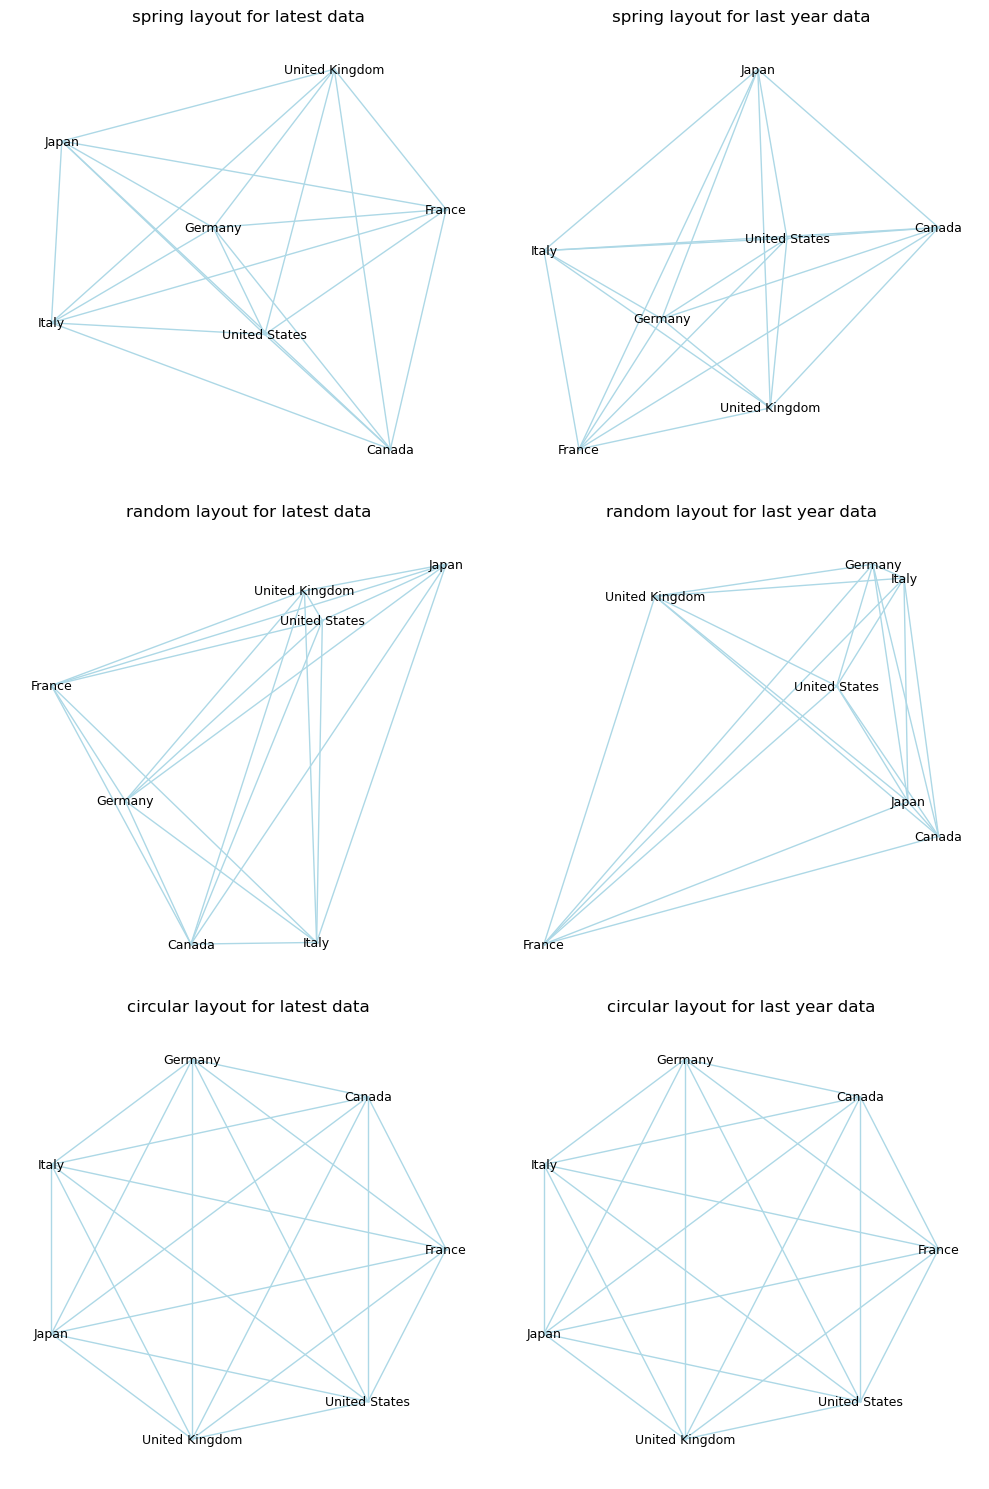

In [11]:
fig, ax = plt.subplots(3, 2, figsize = (10, 15))
layouts = {"spring": nx.spring_layout, "random": nx.random_layout, "circular": nx.circular_layout}
graphs = {"latest": G_latest, "last year": G_last_year}



for i, (layout_name, layout) in enumerate(layouts.items()):
    for j, (graph_name, graph) in enumerate(graphs.items()):
        pos = layout(graph)
        nx.draw_networkx(graph, pos=pos, ax=ax[i][j], font_size=9,**options)
        plt.tight_layout()
        ax[i][j].set_axis_off()
        ax[i][j].set_title(f"{layout_name} layout for {graph_name} data")

In [12]:
layouts.items()

dict_items([('spring', <function spring_layout at 0x152044ea0>), ('random', <function random_layout at 0x152044b80>), ('circular', <function circular_layout at 0x152044c20>)])